<a href="https://colab.research.google.com/github/Mahdi-Saadati/Machine-Learning-2/blob/main/2.a.%20Hoda%20Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div dir="rtl" align="right">
معرفی مجموعه داده هدی و تغییر اندازه و شکل برای استفاده در الگوریتم‌های یادگیری ماشین

معرفی مجموعه داده ارقام دستنویس هدی

مجموعه ارقام دستنویس هدی که اولین مجموعه‌ی بزرگ ارقام دستنویس فارسی است، مشتمل بر ۱۰۲۳۵۳ نمونه دستنوشته سیاه سفید است. این مجموعه طی انجام یک پروژه‏ی کارشناسی ارشد درباره بازشناسی فرمهای دستنویس تهیه شده است. داده های این مجموعه از حدود ۱۲۰۰۰ فرم ثبت نام آزمون سراسری کارشناسی ارشد سال ۱۳۸۴ و آزمون کاردانی پیوسته‏ی دانشگاه جامع علمی کاربردی سال ۱۳۸۳ استخراج شده است.

دیتاست (dataset)
این مجموعه داده در قالب فایل mat متلب منتشر شده است.

In [ ]:
!wget https://raw.githubusercontent.com/Alireza-Akhavan/deeplearning-tensorflow2-notebooks/master/dataset.py
!wget https://github.com/Alireza-Akhavan/deeplearning-tensorflow2-notebooks/raw/master/dataset/Data_hoda_full.mat -P dataset

In [8]:
# مرحله 1: وارد کردن کتابخانه‌ها
import keras  # کتابخانه‌ای برای ساخت شبکه‌های عصبی
from keras.models import Sequential  # مدل دنباله‌ای ساده از لایه‌ها
from keras.layers import Dense, Dropout, Activation  # انواع لایه‌هایی که به مدل اضافه می‌کنیم
import numpy as np  # برای کار با اعداد و ماتریس‌ها
from dataset import load_hoda  # تابعی برای بارگذاری داده‌های حروف فارسی

np.random.seed(123)  # تنظیم یک عدد تصادفی ثابت، برای اینکه نتایج همیشه یکسان باشند

# مرحله 2: بارگذاری داده‌ها (عکس‌های عدد فارسی) برای آموزش و آزمایش
x_train_original, y_train_original, x_test_original, y_test_original = load_hoda()  # بارگذاری داده‌ها

# مرحله 3: آماده‌سازی داده‌های ورودی
x_train = np.array(x_train_original)  # تبدیل لیست آموزش به آرایه عددی
x_test = np.array(x_test_original)    # تبدیل لیست آزمایش به آرایه عددی
x_train = x_train.astype('float32')   # تبدیل داده‌ها به عدد اعشاری (برای دقت بیشتر)
x_test = x_test.astype('float32')     # همین کار برای داده‌های آزمایش
x_train /= 255  # نرمال‌سازی: عددها را به بازه بین ۰ تا ۱ می‌بریم
x_test /= 255   # همین کار برای داده‌های آزمایش

# مرحله 4: آماده‌سازی لیبل‌ها (برچسب‌های جواب درست)
y_train = keras.utils.to_categorical(y_train_original, num_classes=10)  # تبدیل عددها به شکل یک‌در-ده
y_test = keras.utils.to_categorical(y_test_original, num_classes=10)    # مثلاً عدد 3 تبدیل می‌شود به [0,0,0,1,0,0,0,0,0,0]

# مرحله 5: تعریف مدل شبکه عصبی
model = Sequential()  # شروع ساخت مدل ساده
model.add(Dense(64, activation='relu', input_dim=25))  # یک لایه با 64 نورون، فعال‌سازی ReLU، ورودی 25 عدد
model.add(Dense(10, activation='softmax'))  # خروجی با 10 نورون (برای ارقام 0 تا 9) با تابع softmax برای انتخاب بهترین جواب

# مرحله 6: تنظیمات مدل قبل از آموزش
model.compile(loss='categorical_crossentropy',  # نوع خطا را مشخص می‌کنیم
              optimizer='rmsprop',              # روش یادگیری را مشخص می‌کنیم
              metrics=['accuracy'])             # دقت مدل را هم بررسی می‌کنیم

# مرحله 7: آموزش دادن مدل با داده‌های آموزشی
model.fit(x_train, y_train,  # ورودی و خروجی داده‌های آموزش
          epochs=30,         # چند بار همه داده‌ها آموزش داده شوند (۳۰ بار)
          batch_size=64)     # چندتا چندتا به مدل داده شوند (۶۴ تا)

# مرحله 8: ارزیابی مدل با داده‌های آزمایش
loss, acc = model.evaluate(x_test, y_test)  # بررسی خطا و دقت مدل روی داده‌های آزمایشی
print('\nTesting loss: %.2f, acc: %.2f%%' % (loss, acc))  # چاپ نتیجه آزمایش

# پیش‌بینی برچسب‌ها برای داده‌های آزمایش
predictions = model.predict(x_test)  # پیش‌بینی احتمال هر کلاس برای هر ورودی
predicted_classes = np.argmax(predictions, axis=1)  # انتخاب کلاسی که بیشترین احتمال را دارد
print("predicted:")  # چاپ جواب‌های پیش‌بینی‌شده
print(predicted_classes)
print("True Label:")  # چاپ جواب‌های واقعی
print(y_test_original)


Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2080 - loss: 2.2530  
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3533 - loss: 1.9977 
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5071 - loss: 1.8271 
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6306 - loss: 1.6032 
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7279 - loss: 1.4314 
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8039 - loss: 1.2666 
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7982 - loss: 1.0955 
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8133 - loss: 0.9948 
Epoch 9/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8254 - loss: 0.8940 
Epoch 10/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8505 - loss: 0.7721 
Epoch 11/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8581 - loss: 0.7124 
Epoch 12/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

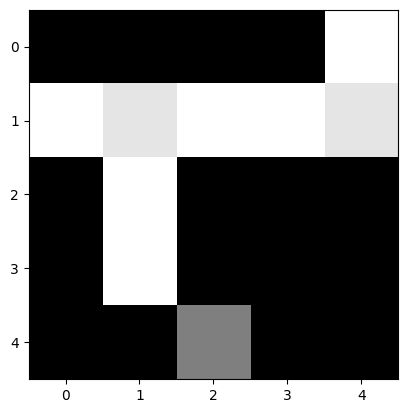

In [18]:
import matplotlib.pyplot as plt
plt.imshow(x_train_original[12].reshape(5, 5), cmap='gray')
plt.show()